In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Loading and preprocessing the Iris dataset
iris = load_iris()
X_all_features = iris.data  # Using all features
X_two_features = iris.data[:, :2]  # Using the first two features only
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

In [ ]:
# Standardizing features
scaler_all = StandardScaler()
scaler_two = StandardScaler()
X_all_features = scaler_all.fit_transform(X_all_features)
X_two_features = scaler_two.fit_transform(X_two_features)

In [ ]:
# Spliting data into training and testing sets
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all_features, y, test_size=0.3, random_state=42)
X_train_two, X_test_two, _, _ = train_test_split(X_two_features, y, test_size=0.3, random_state=42)

In [ ]:
#Initializing weights and bias
def initialize_weights(n_features):
    return np.random.rand(n_features), np.random.rand()

weights_all, bias_all = initialize_weights(X_all_features.shape[1])
weights_two, bias_two = initialize_weights(X_two_features.shape[1])
learning_rate = 0.1
epochs = 100

In [ ]:
# Defining the activation function
def step_function(x):
    return 1 if x >= 0 else 0

In [ ]:
# Implementing the forward pass
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.array([step_function(x) for x in linear_output])

In [ ]:
#Training the perceptron
def train_perceptron(X_train, y_train, weights, bias):
    for epoch in range(epochs):
        for x, target in zip(X_train, y_train):
            prediction = step_function(np.dot(x, weights) + bias)
            error = target - prediction
            weights += learning_rate * error * x
            bias += learning_rate * error
    return weights, bias

In [ ]:
# Training models
weights_all, bias_all = train_perceptron(X_train_all, y_train, weights_all, bias_all)
weights_two, bias_two = train_perceptron(X_train_two, y_train, weights_two, bias_two)

In [ ]:
#Evaluating the models
def evaluate_model(X_test, y_test, weights, bias):
    y_pred = predict(X_test, weights, bias)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

In [ ]:
# Evaluate both cases
metrics_all = evaluate_model(X_test_all, y_test, weights_all, bias_all)
metrics_two = evaluate_model(X_test_two, y_test, weights_two, bias_two)

In [ ]:
print("Metrics using all features:")
print("Accuracy:", metrics_all[0])
print("Precision:", metrics_all[1])
print("Recall:", metrics_all[2])
print("F1-Score:", metrics_all[3])
print("Confusion Matrix:\n", metrics_all[4])

Metrics using all features:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 26]]


In [ ]:
print("Metrics using first two features:")
print("Accuracy:", metrics_two[0])
print("Precision:", metrics_two[1])
print("Recall:", metrics_two[2])
print("F1-Score:", metrics_two[3])
print("Confusion Matrix:\n", metrics_two[4])

Metrics using first two features:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 26]]


In [ ]:
# Visualizing the decision boundaries
def plot_decision_boundary(X, y, weights, bias, title, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = np.array([step_function(np.dot(np.array([x, y] + [0] * (X.shape[1] - 2)), weights) + bias) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

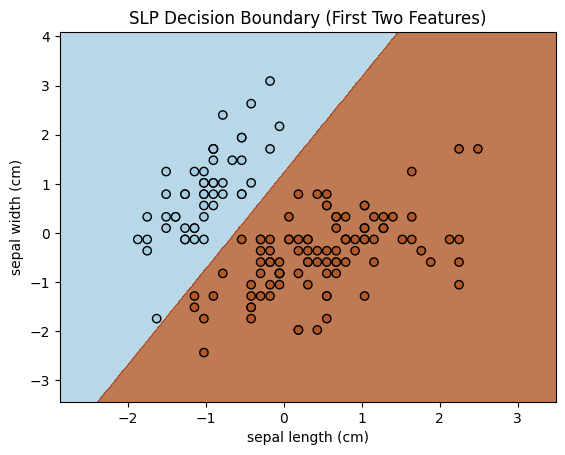

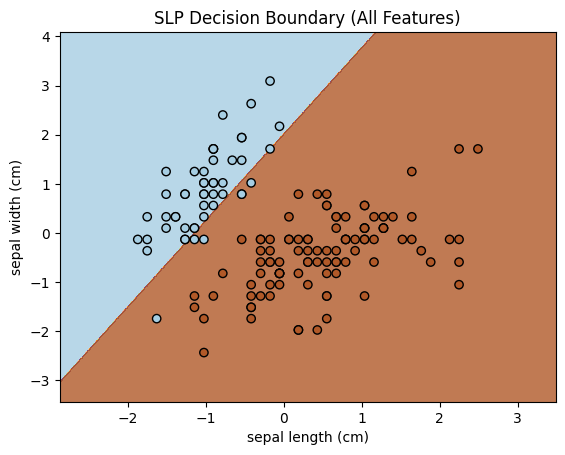

In [ ]:
# Plot decision boundaries
plot_decision_boundary(X_two_features, y, weights_two, bias_two, "SLP Decision Boundary (First Two Features)", iris.feature_names[:2])
plot_decision_boundary(X_all_features, y, weights_all, bias_all, "SLP Decision Boundary (All Features)", iris.feature_names[:2])